## 1. Import required Libraries 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [4]:
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
print(fraud_df)


        user_id          signup_time        purchase_time  purchase_value  \
0         22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1        333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2          1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3        150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4        221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
...         ...                  ...                  ...             ...   
151107   345170  2015-01-27 03:03:34  2015-03-29 00:30:47              43   
151108   274471  2015-05-15 17:43:29  2015-05-26 12:24:39              35   
151109   368416  2015-03-03 23:07:31  2015-05-20 07:07:47              40   
151110   207709  2015-07-09 20:06:07  2015-09-07 09:34:46              46   
151111   138208  2015-06-10 07:02:20  2015-07-21 02:03:53              20   

            device_id  source browser sex  age    ip_address  class  
0    

## 2. Data Cleaning

In [14]:
fraud_df.isnull().sum()


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [15]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


## 3. Handle Missing Values

In [17]:
fraud_df.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

### Remove Duplicates

In [20]:
import os
import pandas as pd

creditcard_df = fraud_df.drop_duplicates()


output_folder = r'C:\Users\HP\Desktop\Tenx_challenge_folder\fraud-detection\data\processed' 
output_path = os.path.join(output_folder, 'fraud_cleaned.csv')
creditcard_df.to_csv(output_path, index=False)
print(f"File saved successfully to: {output_path}")

File saved successfully to: C:\Users\HP\Desktop\Tenx_challenge_folder\fraud-detection\data\processed\fraud_cleaned.csv


In [24]:
# Returns the total count of duplicate rows

creditcard_df = pd.read_csv("../data/processed/fraud_cleaned.csv")
duplicate_count = creditcard_df.duplicated().sum()

print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


## Correct Data Types

In [26]:
fraud_df["signup_time"] = pd.to_datetime(fraud_df["signup_time"])
fraud_df["purchase_time"] = pd.to_datetime(fraud_df["purchase_time"])


## Exploratory Data Analysis (EDA)

### Univariate Analysis

### Target Variable Distribution     

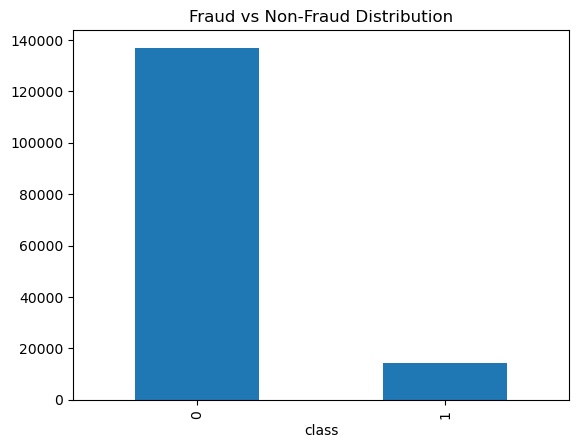

In [27]:
plt.figure()
fraud_df["class"].value_counts().plot(kind="bar")
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


## Transaction Amount Distribution

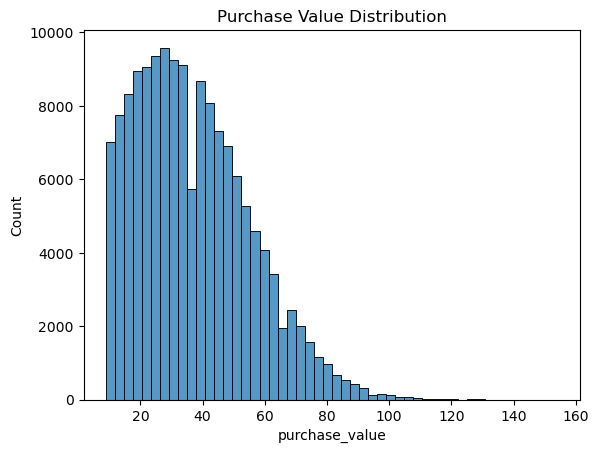

In [28]:
plt.figure()
sns.histplot(fraud_df["purchase_value"], bins=50)
plt.title("Purchase Value Distribution")
plt.show()


## Bivariate Analysis

### Purchase Value vs Fraud

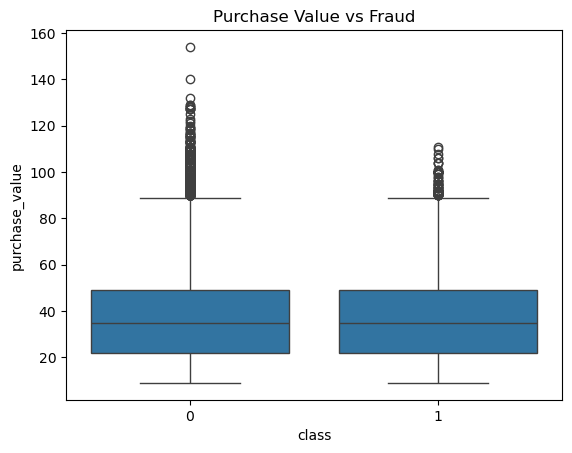

In [29]:
plt.figure()
sns.boxplot(x="class", y="purchase_value", data=fraud_df)
plt.title("Purchase Value vs Fraud")
plt.show()


### Class Imbalance Analysis

In [30]:
class_counts = fraud_df["class"].value_counts()
fraud_ratio = class_counts[1] / class_counts.sum()

print("Class Distribution:")
print(class_counts)
print(f"Fraud Ratio: {fraud_ratio:.4f}")


Class Distribution:
class
0    136961
1     14151
Name: count, dtype: int64
Fraud Ratio: 0.0936


## Geolocation Integration

### Convert IP Address to Integer

In [36]:
import pandas as pd
import numpy as np

# 1. Convert the IP address column to int64
fraud_df["ip_address"] = fraud_df["ip_address"].astype(np.int64)

# 2. Save the updated dataframe to a new file
# 'index=False' prevents pandas from writing a column for the row numbers
fraud_df.to_csv(r"C:\Users\HP\Desktop\Tenx_challenge_folder\fraud-detection\data\processed\fraud_cleaned.csv", index=False)

print("Conversion complete and file saved as 'fraud_cleaned.csv'")

Conversion complete and file saved as 'fraud_cleaned.csv'


## Merge Fraud Data with IP-to-Country (Range-Based Lookup)

### Rename columns for clarity:

In [38]:
ip_df = pd.read_csv(r"C:\Users\HP\Desktop\Tenx_challenge_folder\fraud-detection\data\raw\IpAddress_to_Country.csv")
print(ip_df)


        lower_bound_ip_address  upper_bound_ip_address    country
0                 1.677722e+07                16777471  Australia
1                 1.677747e+07                16777727      China
2                 1.677773e+07                16778239      China
3                 1.677824e+07                16779263  Australia
4                 1.677926e+07                16781311      China
...                        ...                     ...        ...
138841            3.758092e+09              3758093311  Hong Kong
138842            3.758093e+09              3758094335      India
138843            3.758095e+09              3758095871      China
138844            3.758096e+09              3758096127  Singapore
138845            3.758096e+09              3758096383  Australia

[138846 rows x 3 columns]


In [ ]:
ip_df.rename(columns={
    "lower_bound_ip_address": "ip_lower",
    "upper_bound_ip_address": "ip_upper"
}, inplace=True)
ip_df.to_csv(r"C:\Users\HP\Desktop\Tenx_challenge_folder\fraud-detection\data\processed\ip_processed.csv", index=False)
print("Conversion complete and file saved as 'ip_processed.csv'")

Conversion complete and file saved as 'fraud_cleaned.csv'


## Efficient Range-Based Merge

In [46]:
fraud_df["country"] = "Unknown"

for _, row in ip_df.iterrows():
    mask = (
        (fraud_df["ip_address"] >= row["ip_lower"]) &
        (fraud_df["ip_address"] <= row["ip_upper"])
    )
    fraud_df.loc[mask, "country"] = row["country"]
fraud_df.to_csv(r"C:\Users\HP\Desktop\Tenx_challenge_folder\fraud-detection\data\processed\fraud_cleaned.csv", index=False)
print("Conversion complete and file saved as 'fraud_cleaned.csv'")

Conversion complete and file saved as 'fraud_cleaned.csv'


## Fraud Patterns by Country

In [47]:
country_fraud = fraud_df.groupby("country")["class"].mean().sort_values(ascending=False)

print(country_fraud.head(10))


country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Ecuador                  0.264151
Tunisia                  0.262712
Peru                     0.260504
Bolivia                  0.245283
Kuwait                   0.233333
Name: class, dtype: float64


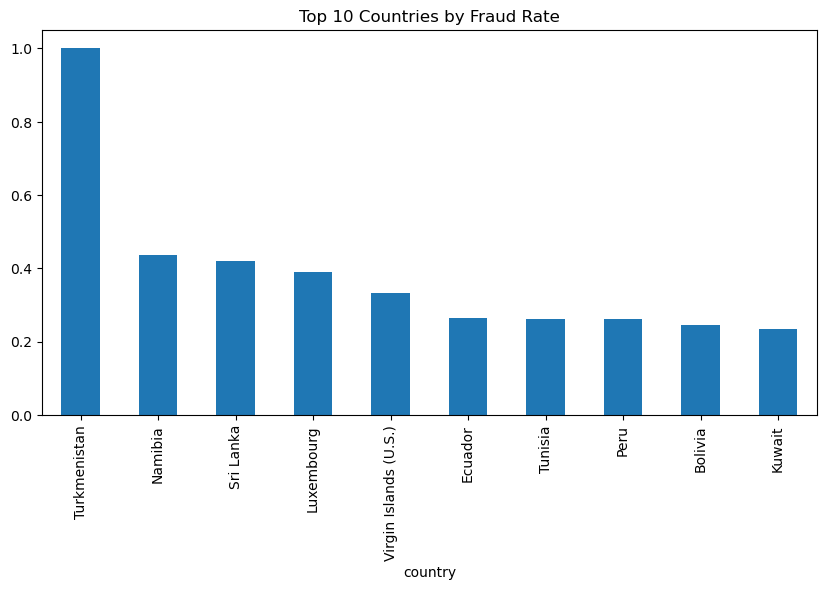

In [48]:
plt.figure(figsize=(10,5))
country_fraud.head(10).plot(kind="bar")
plt.title("Top 10 Countries by Fraud Rate")
plt.show()


## Feature Engineering

### Transaction Frequency & Velocity

#### Number of Transactions per User

In [52]:
fraud_df["transaction_count"] = fraud_df.groupby("user_id")["user_id"].transform("count")
##print(fraud_df[["user_id", "transaction_count"]].drop_duplicates().head(10))
print(fraud_df.head(10))



   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
5   159135  2015-05-21 06:03:03  2015-07-09 08:05:14              42   
6    50116  2015-08-01 22:40:52  2015-08-27 03:37:57              11   
7   360585  2015-04-06 07:35:45  2015-05-25 17:21:14              27   
8   159045  2015-04-21 23:38:34  2015-06-02 14:01:54              30   
9   182338  2015-01-25 17:49:49  2015-03-23 23:05:42              62   

       device_id source browser sex  age  ip_address  class        country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   732758368      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53   35031138

## Time-Based Features

In [56]:
fraud_df["hour_of_day"] = fraud_df["purchase_time"].dt.hour
fraud_df["day_of_week"] = fraud_df["purchase_time"].dt.dayofweek
print(fraud_df[["purchase_time", "hour_of_day", "day_of_week"]].head(10))

AttributeError: Can only use .dt accessor with datetimelike values

## Time Since Signup

In [57]:
fraud_df["time_since_signup"] = (
    fraud_df["purchase_time"] - fraud_df["signup_time"]
).dt.total_seconds()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

## Data Transformation

### Separate Features and Target

In [59]:
X = fraud_df.drop(columns=["class"])
y = fraud_df["class"]
print(X.head())


   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age  ip_address        country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   732758368          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53   350311387  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2621473820  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3840542443        Unknown   
4  NAUITBZFJKHWW    Ads  Safari   M   45   415583117  United States   

   transaction_count  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  


### Identify Feature Types

In [60]:
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns
print(numerical_features)
print(categorical_features)

Index(['user_id', 'purchase_value', 'age', 'ip_address', 'transaction_count'], dtype='object')
Index(['signup_time', 'purchase_time', 'device_id', 'source', 'browser', 'sex',
       'country'],
      dtype='object')


### Build Preprocessing Pipelines

#### Numerical Scaling

In [63]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])


#### Categorical Encoding

In [ ]:
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


### Combine Transformations

In [65]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


### Apply Transformations

In [67]:
X_processed = preprocessor.fit_transform(X)

print("Final feature matrix shape:", X_processed.shape)
fraud_df = pd.read_csv(r"C:\Users\HP\Desktop\Tenx_challenge_folder\fraud-detection\data\processed\fraud_cleaned.csv")
print(fraud_df)


Final feature matrix shape: (151112, 439944)
        user_id          signup_time        purchase_time  purchase_value  \
0         22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1        333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2          1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3        150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4        221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
...         ...                  ...                  ...             ...   
151107   345170  2015-01-27 03:03:34  2015-03-29 00:30:47              43   
151108   274471  2015-05-15 17:43:29  2015-05-26 12:24:39              35   
151109   368416  2015-03-03 23:07:31  2015-05-20 07:07:47              40   
151110   207709  2015-07-09 20:06:07  2015-09-07 09:34:46              46   
151111   138208  2015-06-10 07:02:20  2015-07-21 02:03:53              20   

            device_id  source 